# Deteksi Orang dengan YoLo V8

# Import Library

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install opencv-python

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [ ]:
from ultralytics import YOLO
import os

# Akusisi Data (Data Acquisition)

Dataset yang dipakai dalam penelitian ini adalah data public yang sudah melewati proses labeling melalui roboflow. Link Dataset: Dataset Daun Kentang](https://universe.roboflow.com/plant-disease-slqvd/potato-leaf-disease/dataset/1/images?split=train)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4YfrMtUb4CIVuPjte4wl")
project = rf.workspace("object-detection-b0jxc").project("people-detection-jhker")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.45, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to people-detection-2 in yolov8:: 100%|██████████| 150/150 [00:00<00:00, 7711.35it/s]


In [ ]:
# pindah data.yaml
# Path to the source file
source_file = "/content/people-detection-2/data.yaml"

# Path to the destination directory
destination_directory = "/content/"

# Path to the desired destination file
destination_file = os.path.join(destination_directory, "data.yaml")

try:
    # Move the file
    os.rename(source_file, destination_file)
    print("File moved successfully!")
except Exception as e:
    print("An error occurred:", e)

File moved successfully!


# Pelatihan Model (Train Model)

In [ ]:
import os

model = YOLO('yolov8n.pt')

detect_dir = '/content/runs/detect'
model_dir = 'yolov8n_v1_train'
model_dir_path = os.path.join(detect_dir, model_dir)

In [ ]:
import shutil

if os.path.exists(model_dir):
    print("Found 'yolov8n_v1_train' folder, deleting it...")
    shutil.rmtree(model_dir)
    print("Deleted 'yolov8n_v1_train' folder.")
else:
    print("No 'yolov8n_v1_train' folder found.")
    print('Train model . . . ')
    print()

model.train(data='/content/data.yaml',
            task='detect',
            imgsz=640,
            epochs=50,
            batch=32,
            mode='train',
            name=model_dir)

No 'yolov8n_v1_train' folder found.
Train model . . . 

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v1_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

100%|██████████| 755k/755k [00:00<00:00, 66.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/people-detection-2/train/labels... 48 images, 0 backgrounds, 0 corrupt: 100%|██████████| 48/48 [00:00<00:00, 1082.68it/s]

train: New cache created: /content/people-detection-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/people-detection-2/valid/labels... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 974.46it/s]

val: New cache created: /content/people-detection-2/valid/labels.cache


Plotting labels to runs/detect/yolov8n_v1_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_v1_train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.56G      1.739      3.485      1.219        644        640: 100%|██████████| 2/2 [00:05<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.18s/it]

                   all         14        415     0.0738      0.747     0.0671     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.63G      1.682      3.462      1.204        595        640: 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         14        415     0.0719      0.728     0.0647     0.0415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.69G      1.764      3.505      1.215        698        640: 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         14        415     0.0729      0.737     0.0645     0.0415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.61G      1.614      3.434      1.208        479        640: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         14        415      0.084      0.851      0.166      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.52G       1.26      3.176      1.067        591        640: 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         14        415     0.0964      0.976      0.386      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.55G      1.105      2.662     0.9715        685        640: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         14        415     0.0976      0.988        0.4      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.47G      1.041      2.028     0.9441        549        640: 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         14        415     0.0971      0.983      0.413       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.23G          1      1.438      0.943        464        640: 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         14        415          1      0.175      0.539      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.29G      1.062      1.176     0.9291        492        640: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         14        415      0.975       0.19      0.811      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.53G      1.061      1.119     0.9131        651        640: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         14        415      0.983      0.421      0.867      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.52G     0.9866       0.97     0.9071        620        640: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         14        415      0.951      0.563      0.896      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.19G     0.9044     0.8747     0.9086        554        640: 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         14        415       0.96      0.627      0.903      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.37G      1.129     0.9038     0.9311        766        640: 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         14        415      0.942      0.628      0.869       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.51G     0.9432     0.8465     0.8988        711        640: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         14        415      0.939      0.619      0.869      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       4.2G      0.977     0.8674      0.923        667        640: 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         14        415      0.934      0.648      0.899      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.41G     0.9741     0.8226     0.8999        763        640: 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         14        415      0.923      0.666      0.906      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.29G     0.8544     0.7698     0.9095        579        640: 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         14        415      0.931      0.712      0.912      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.55G     0.8618      0.759     0.9001        601        640: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         14        415      0.935      0.758      0.919      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.41G     0.8741     0.7461     0.8912        772        640: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         14        415      0.936      0.776      0.931      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       4.5G     0.8247     0.7363     0.9022        538        640: 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         14        415      0.939      0.819      0.942      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.52G     0.9281     0.7536     0.8863        888        640: 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         14        415      0.927      0.814      0.943      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.41G     0.8259     0.7232     0.8917        666        640: 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         14        415      0.932      0.875      0.954      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.53G     0.8177     0.7154     0.8946        678        640: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         14        415      0.929      0.879      0.955       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.57G     0.7822     0.6892     0.8881        560        640: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         14        415       0.93      0.867      0.952      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.47G     0.7437     0.6685     0.8868        553        640: 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         14        415       0.92      0.889      0.952      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.35G     0.7602     0.6563     0.8825        656        640: 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         14        415       0.92      0.892      0.959      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.45G     0.7322     0.6595     0.8677        562        640: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         14        415      0.918      0.893       0.96      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       4.4G      0.714     0.6465     0.8702        574        640: 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         14        415      0.922      0.908      0.962      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       4.5G     0.8036     0.6744     0.8666        834        640: 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         14        415      0.922      0.913      0.966      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.56G     0.7257     0.6394     0.8708        538        640: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         14        415       0.93      0.913       0.97      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.44G     0.7524     0.6641     0.8684        546        640: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         14        415       0.93      0.916      0.972      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.45G     0.7506     0.6542     0.8803        608        640: 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         14        415      0.926      0.918      0.974      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.4G     0.6901      0.629     0.8601        603        640: 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         14        415      0.929      0.918      0.968      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.24G     0.7112     0.6271     0.8623        540        640: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         14        415      0.933      0.916       0.97      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.45G     0.7374     0.6306     0.8728        767        640: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         14        415      0.933      0.918      0.971      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.38G      0.709      0.605     0.8628        606        640: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         14        415      0.941      0.918      0.971      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.44G     0.6928     0.6035     0.8696        547        640: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         14        415       0.94      0.918      0.972      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.45G     0.6833     0.6091     0.8622        610        640: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         14        415      0.941      0.918      0.976      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.45G     0.7218     0.6084     0.8523        698        640: 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         14        415      0.939      0.918      0.979      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.38G     0.6734     0.6257     0.8626        437        640: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         14        415      0.945      0.918       0.98      0.809


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.41G     0.6578     0.6685     0.8544        412        640: 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         14        415      0.943      0.915      0.979      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.63G     0.6571     0.6635     0.8593        370        640: 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         14        415      0.934      0.916      0.975      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.56G     0.6581     0.6434     0.8512        372        640: 100%|██████████| 2/2 [00:04<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         14        415      0.936      0.918      0.975      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.18G     0.6455     0.6148     0.8479        386        640: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         14        415      0.934      0.921      0.977      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.38G      0.637     0.6059     0.8588        390        640: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         14        415      0.938      0.925      0.978      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.41G     0.6263     0.6051     0.8586        415        640: 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         14        415       0.94      0.923      0.979      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.18G      0.634     0.6012     0.8411        391        640: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         14        415      0.957      0.913      0.979      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       4.4G     0.6175     0.5917     0.8542        365        640: 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         14        415      0.955      0.918      0.979      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       4.4G     0.6494     0.6094     0.8383        370        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         14        415      0.957      0.919       0.98      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.17G     0.5984     0.5832     0.8463        350        640: 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         14        415      0.956      0.923      0.981      0.841



50 epochs completed in 0.036 hours.
Optimizer stripped from runs/detect/yolov8n_v1_train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolov8n_v1_train/weights/best.pt, 6.3MB

Validating runs/detect/yolov8n_v1_train/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


                   all         14        415      0.957      0.923      0.981      0.841
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/yolov8n_v1_train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c556da04dc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Evaluasi

In [ ]:
from IPython.display import Image

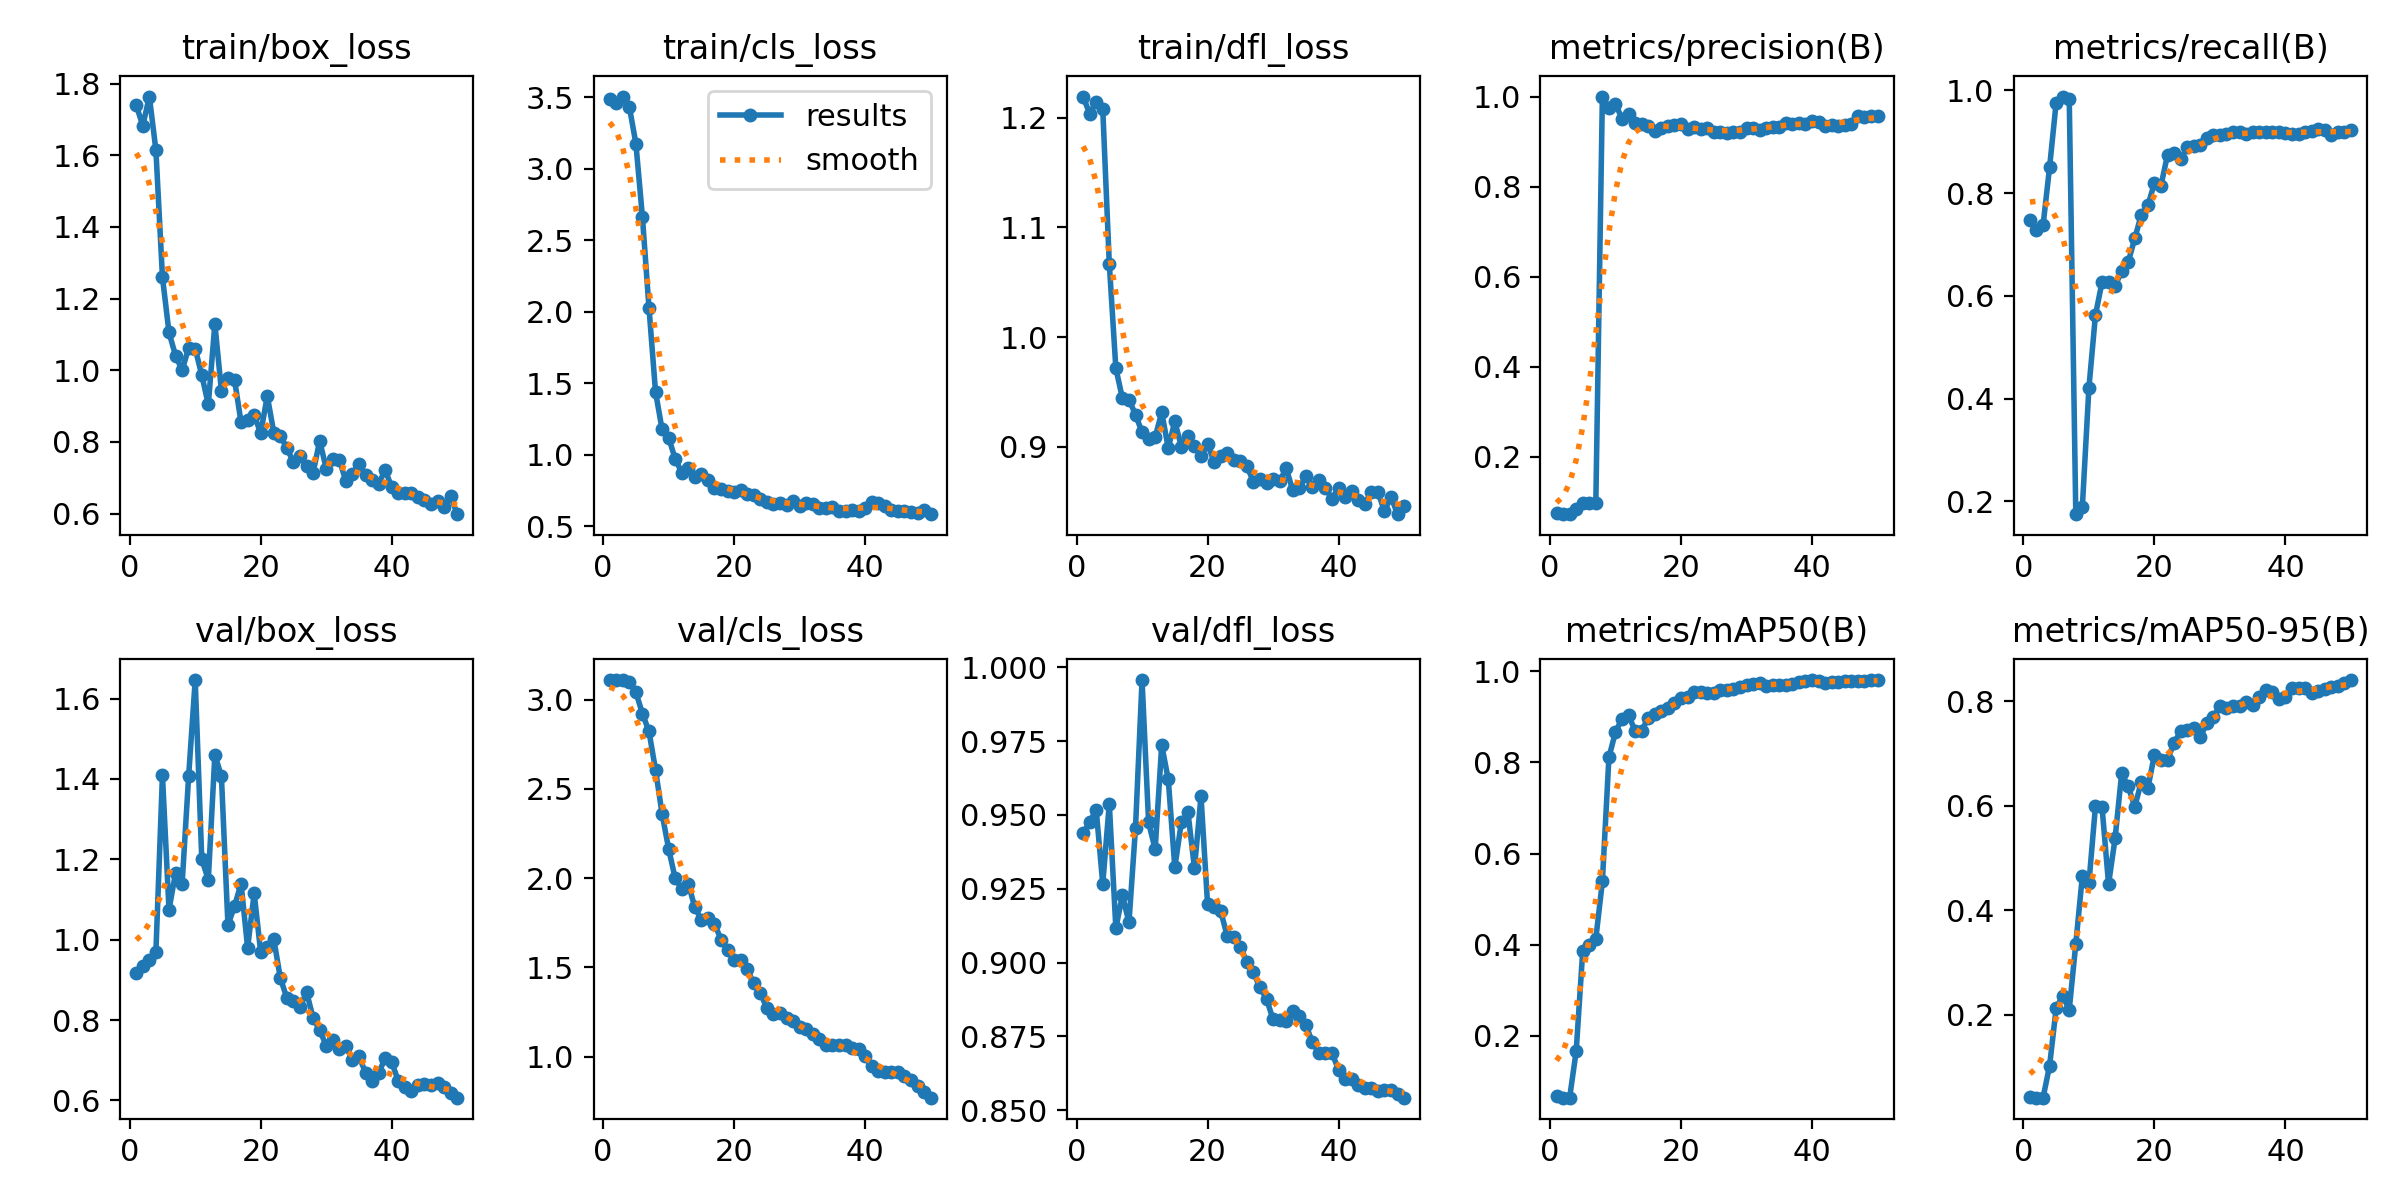

In [ ]:
Image(filename=model_dir_path+'/results.png', width=600)

Secara keseluruhan, terlihat bahwa selama pelatihan, nilai Box Loss, Class Loss, dan DFL Loss terus menurun, menunjukkan peningkatan performa model. Precision, Recall, dan mAP juga mengalami peningkatan yang signifikan, terutama setelah Epoch 10, yang menandakan model semakin akurat dalam mendeteksi objek

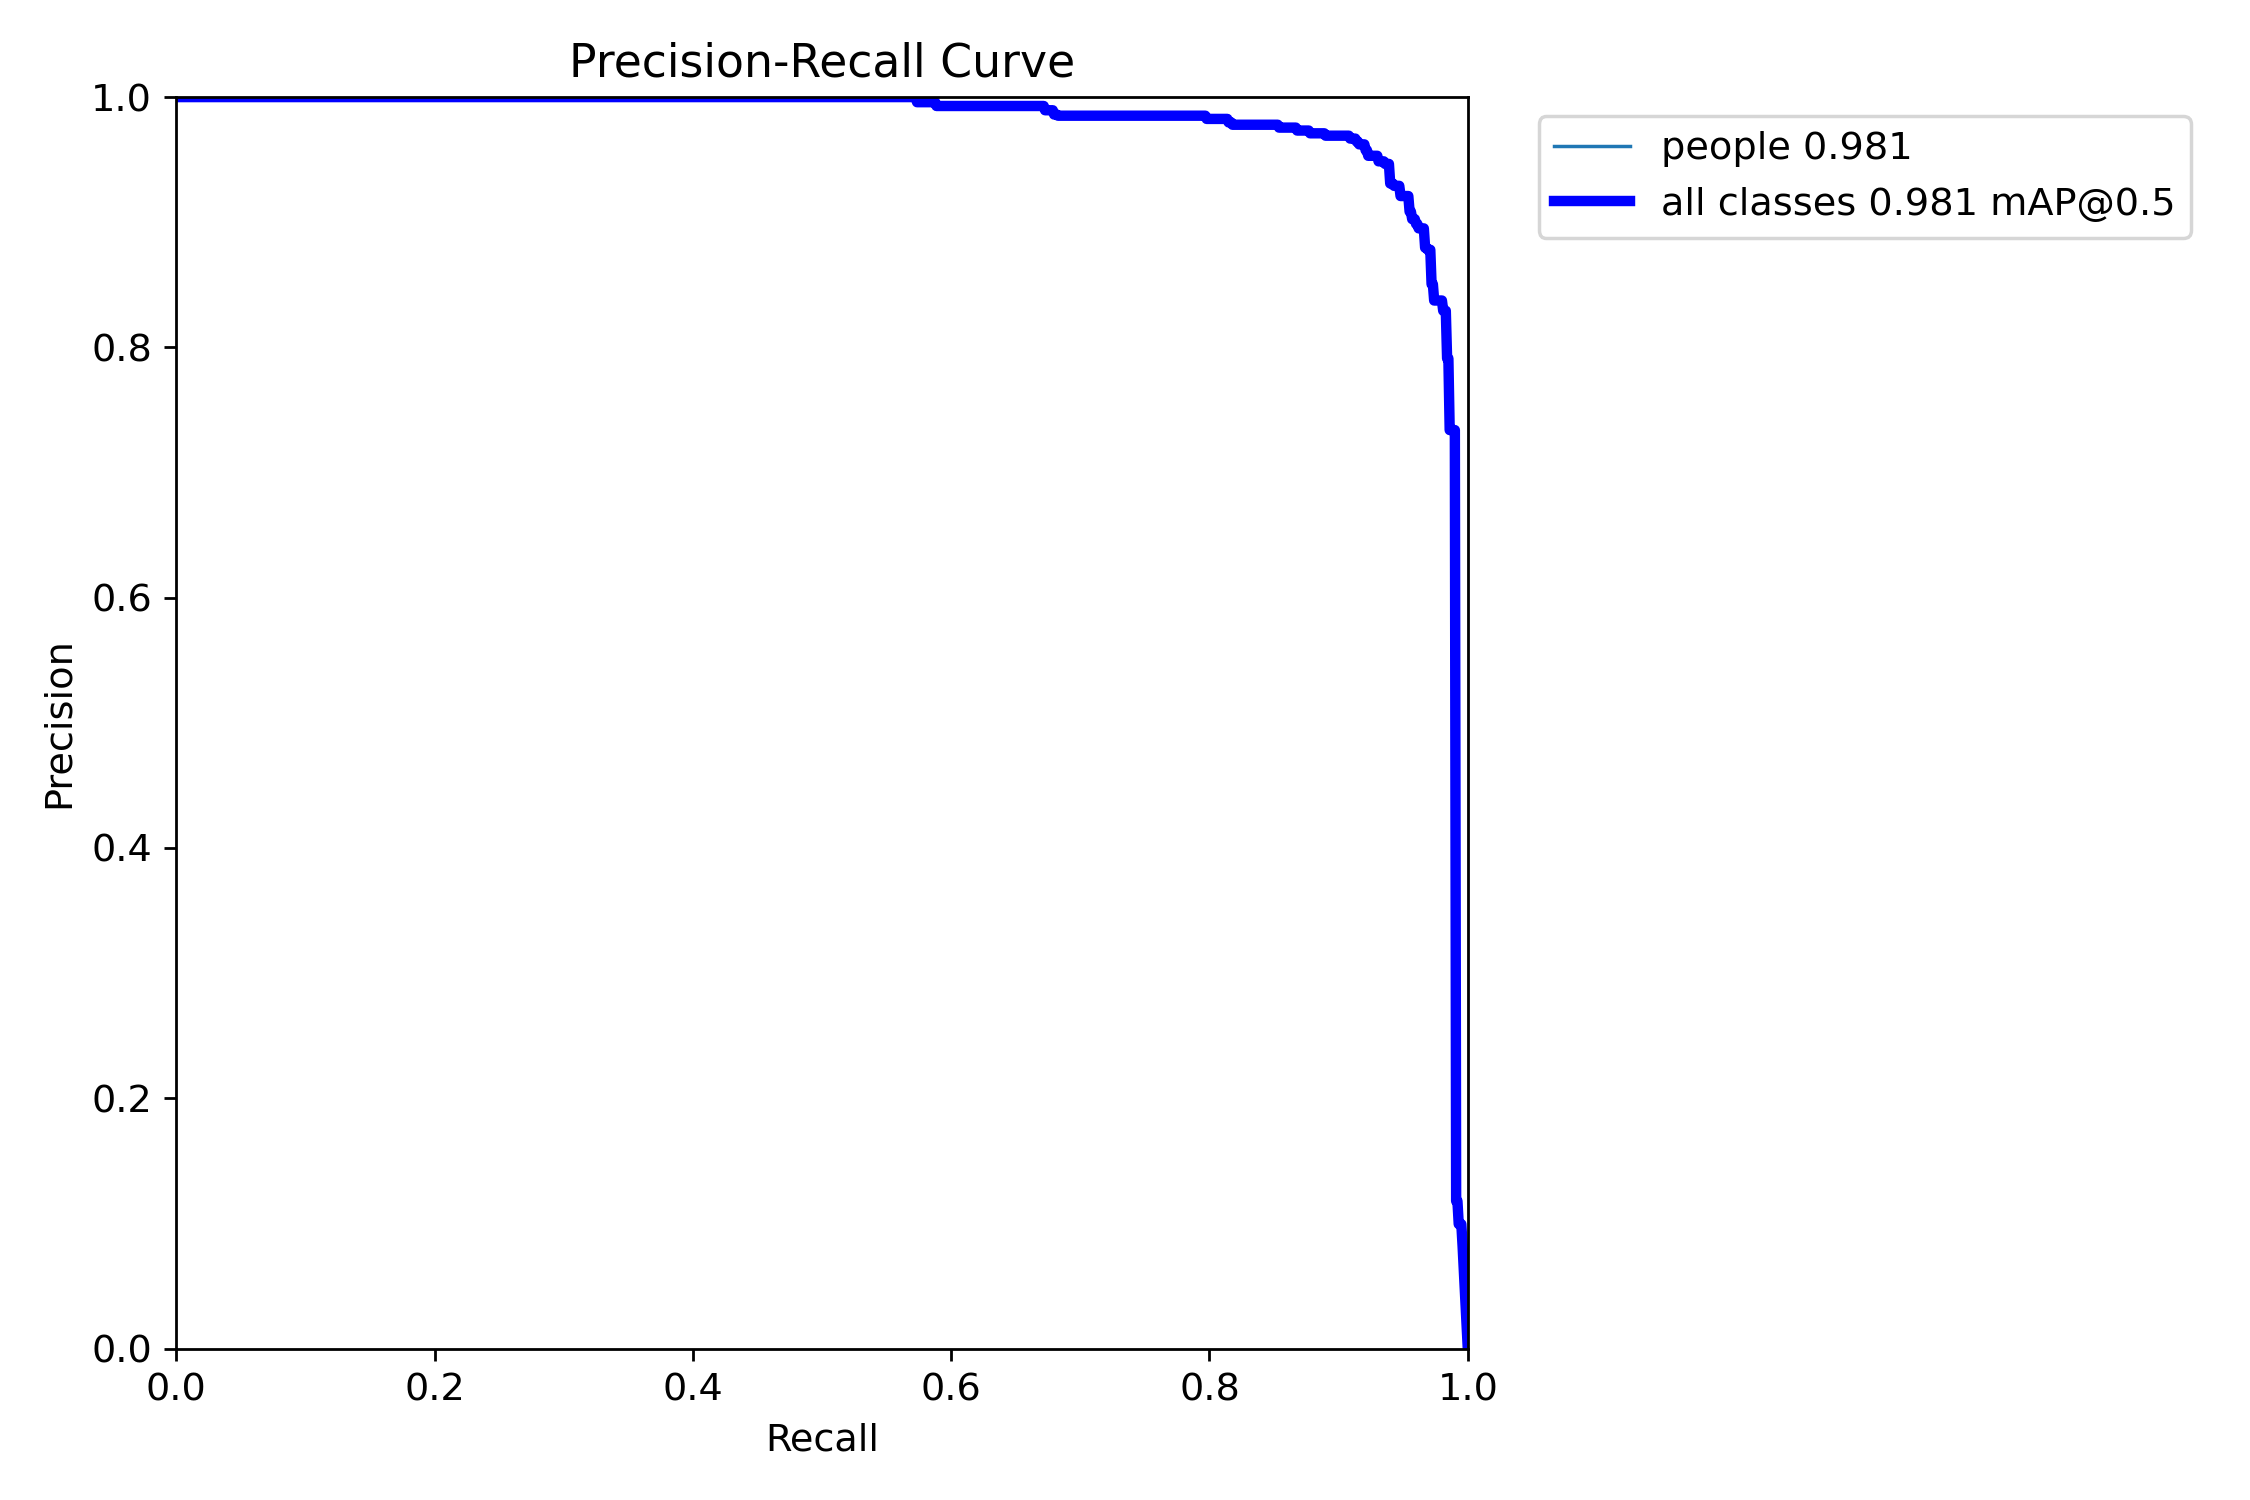

In [ ]:
Image(filename=model_dir_path+'/PR_curve.png', width=600)

Kurva Precision-Recall ini menunjukkan bahwa model YOLO yang dilatih sangat efektif dalam mendeteksi orang, dengan nilai precision dan recall yang sangat tinggi, yaitu 0.981, menghasilkan kinerja keseluruhan yang sangat baik.

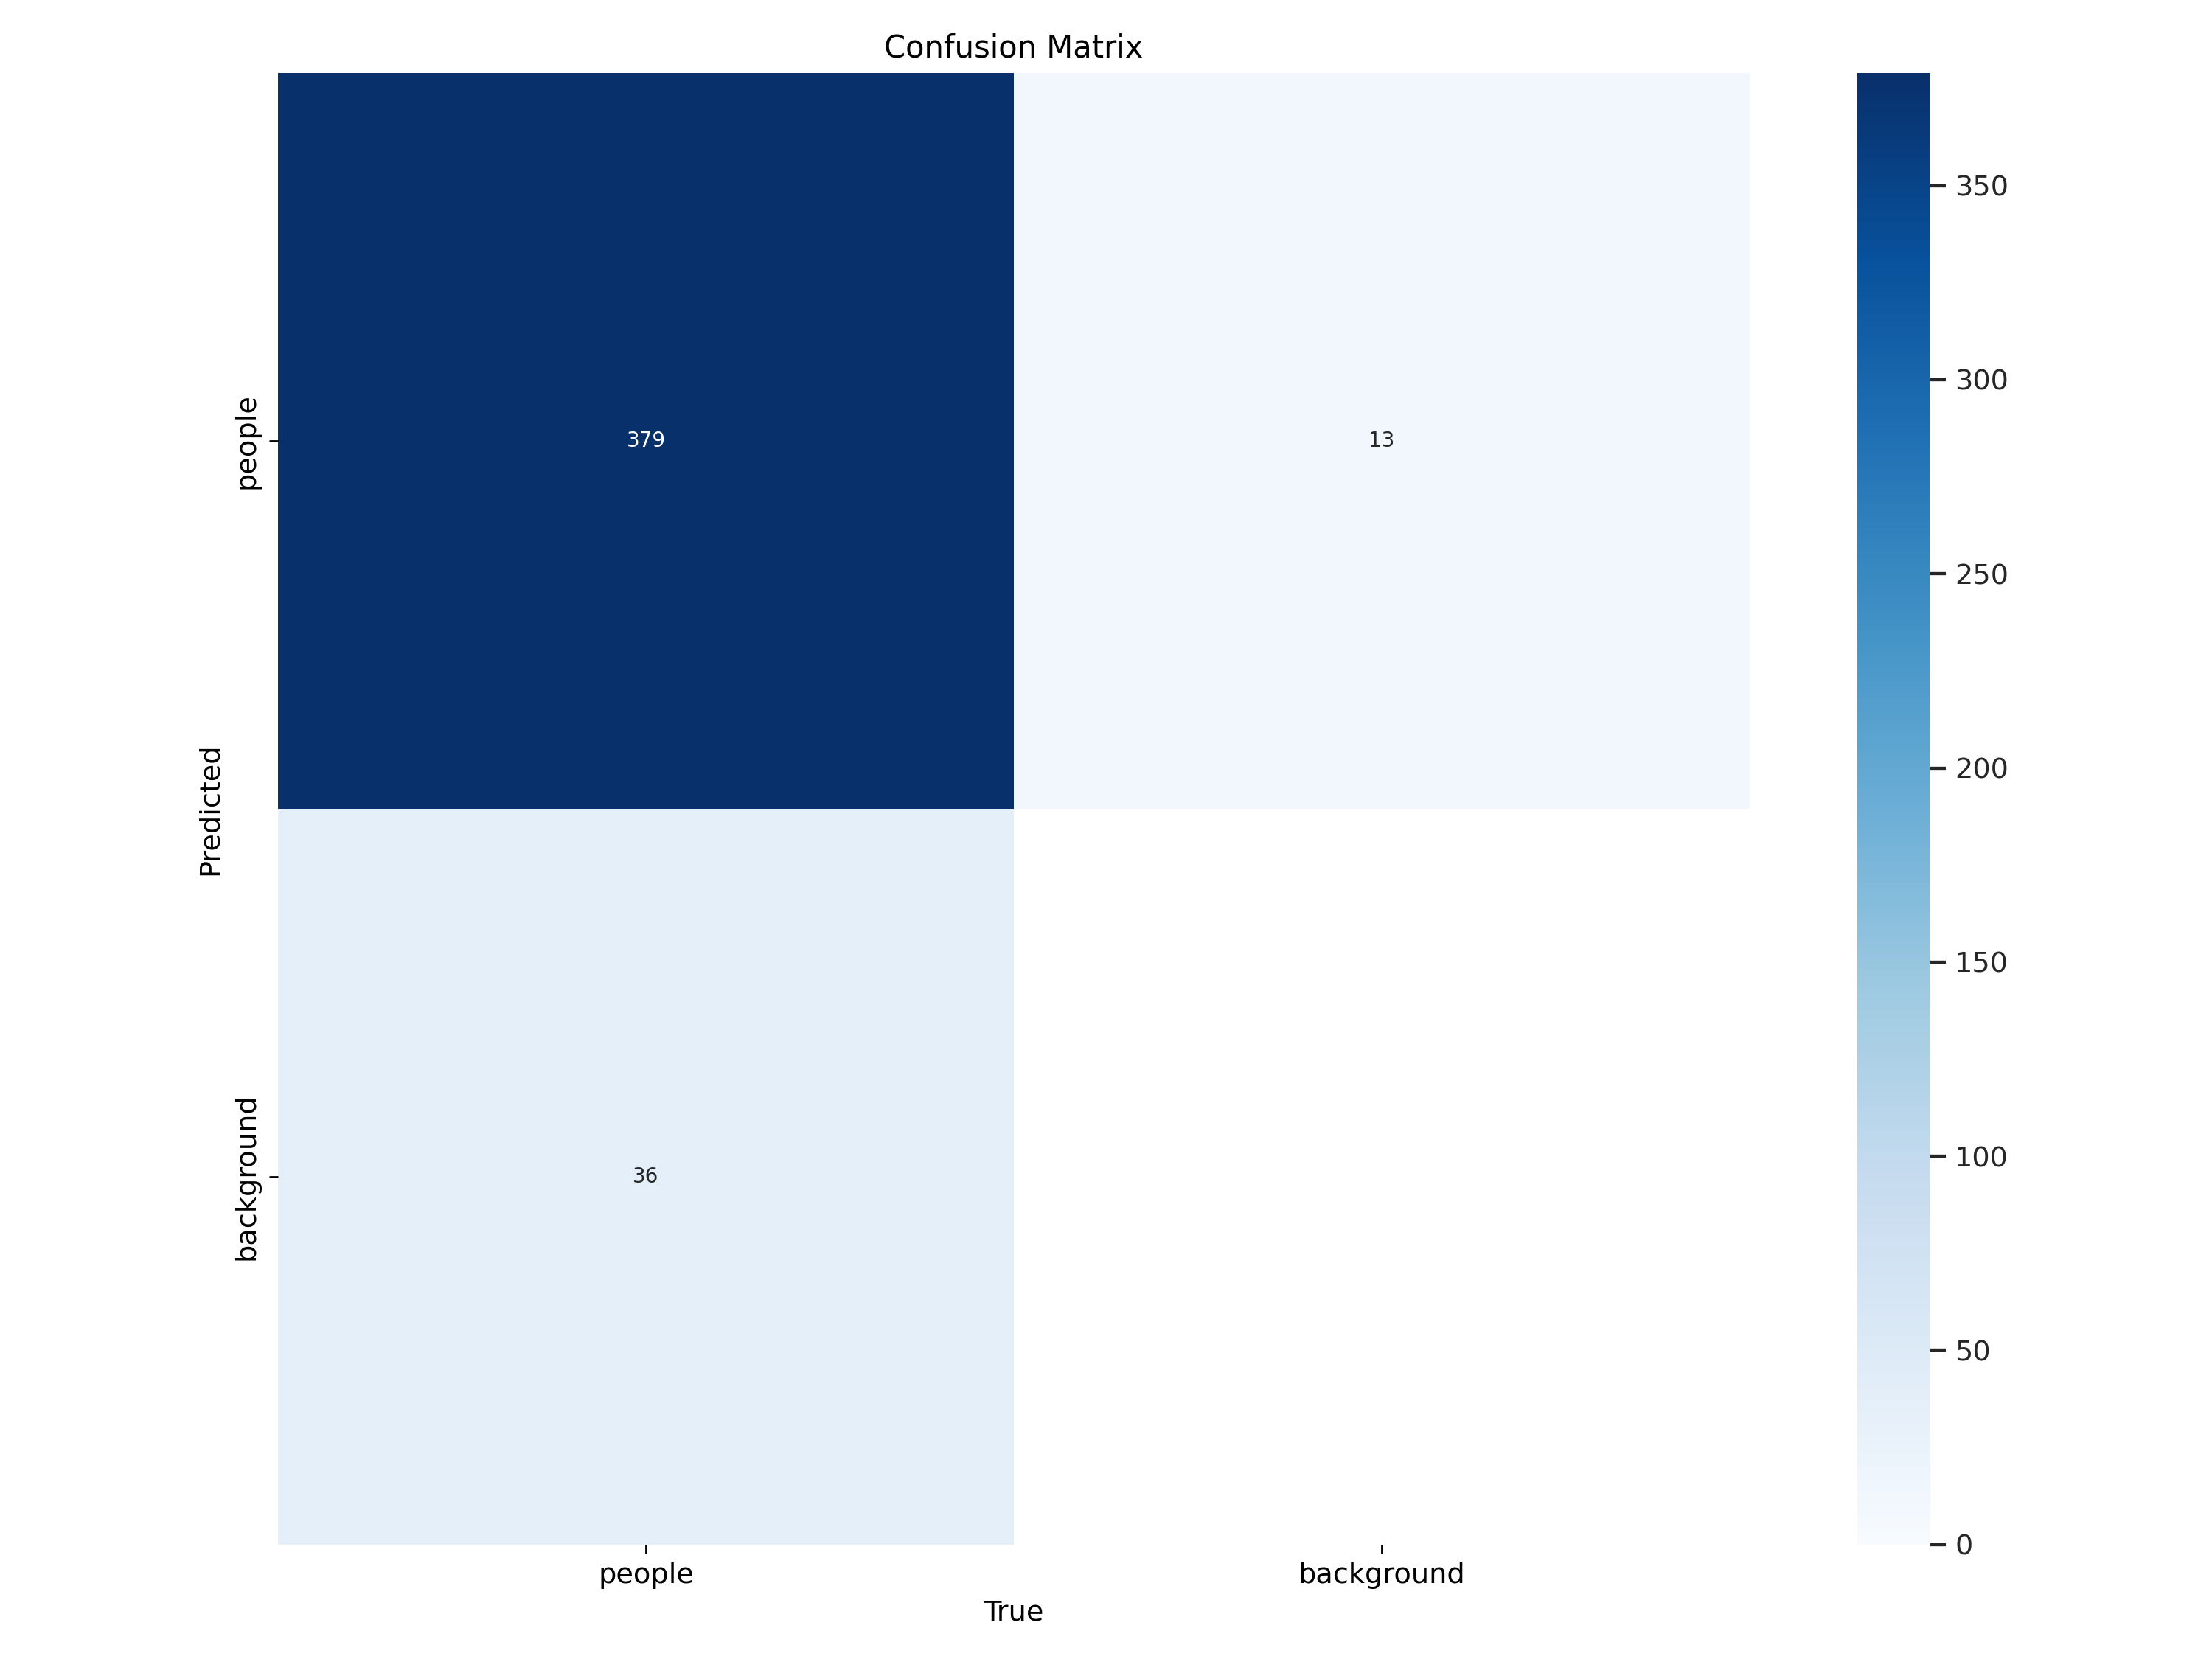

In [ ]:
Image(filename=model_dir_path+'/confusion_matrix.png', width=600)

Confusion matrix ini menunjukkan bahwa model YOLO yang dilatih sangat baik dalam mendeteksi orang, dengan jumlah prediksi benar (true positives) yang jauh lebih tinggi dibandingkan dengan jumlah kesalahan (false positives dan false negatives). Model ini mampu mendeteksi 379 dari 428 objek "people" dengan benar, hanya melakukan kesalahan kecil dalam klasifikasi

Hasil Prediksi 


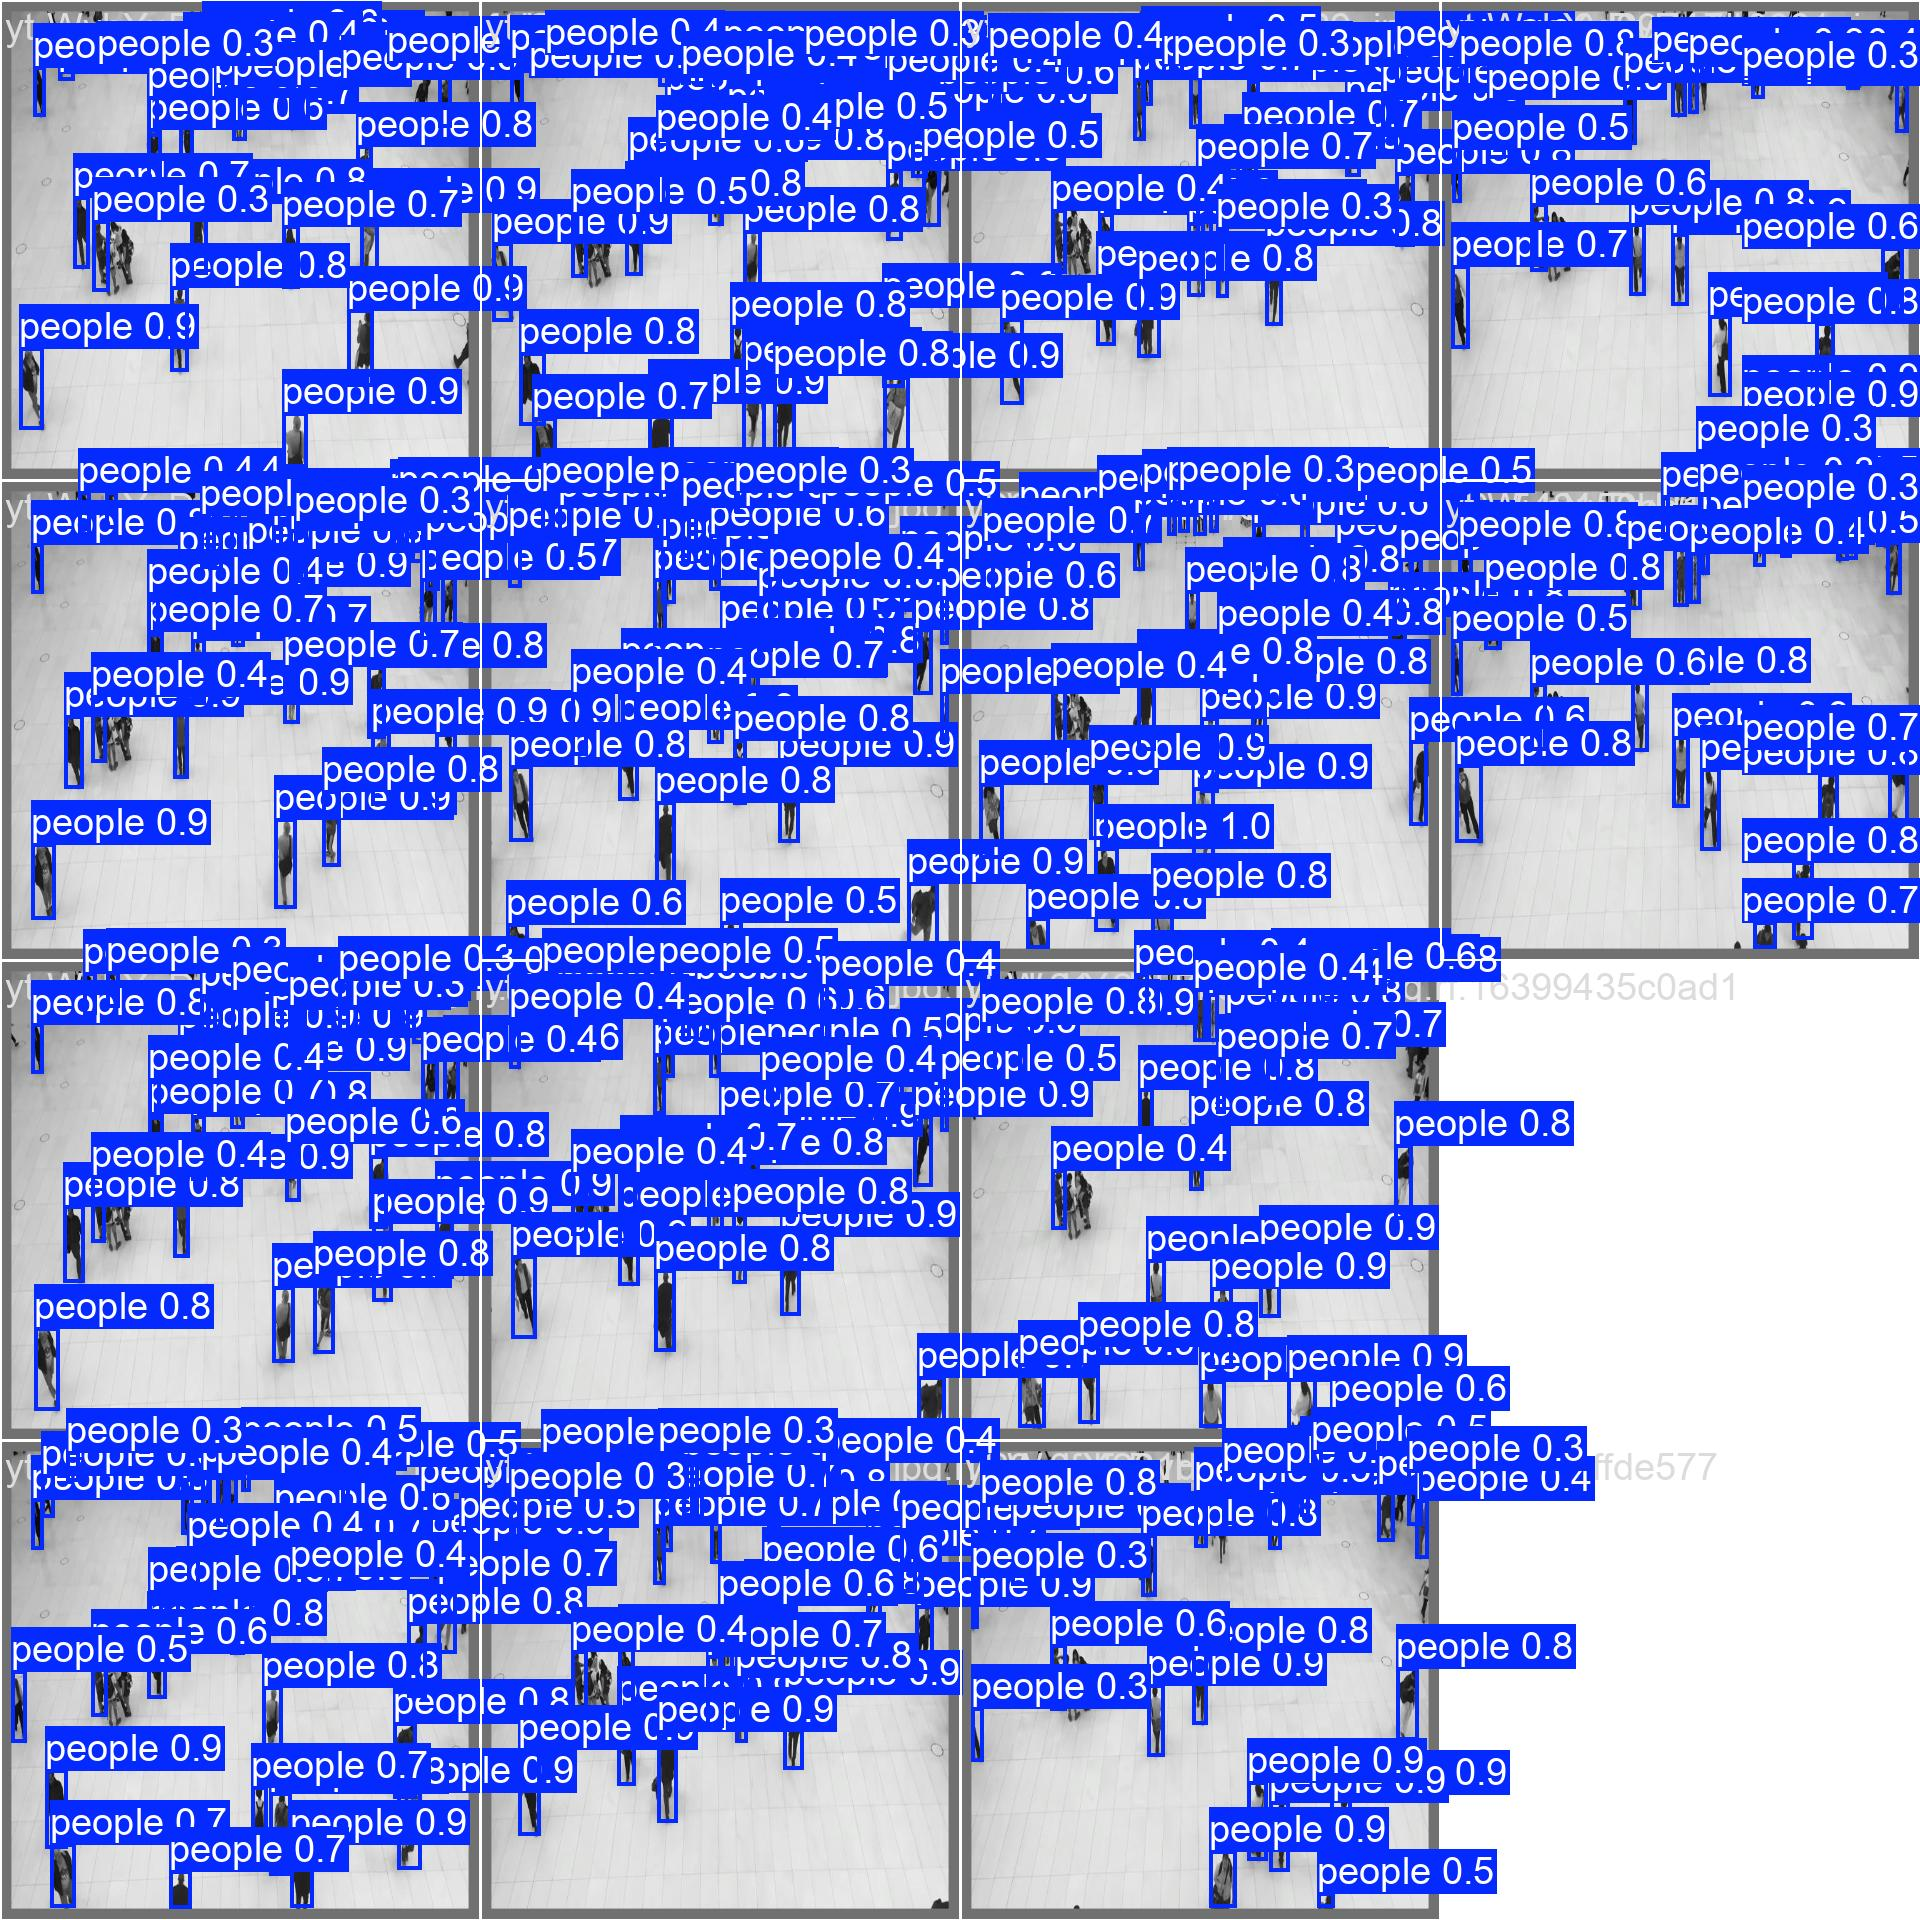

In [ ]:
print('Hasil Prediksi ')
Image(filename=model_dir_path+'/val_batch0_pred.jpg', width=600)

# Save Model Android

<h4 style="border-bottom: 3px solid #FAD7A0; padding: 12px 12px; font-family: Sans-Serif; color:black">
<b>Select best model</b></h4>

In [ ]:
model = YOLO(model_dir_path+'/weights/best.pt')

# Model Inference

Saving orang jalan.jpg to orang jalan (1).jpg
Found '/runs/detect/predict' folder, deleting it...
Deleted '/runs/detect/predict' folder.

image 1/1 /content/orang jalan (1).jpg: 416x640 5 peoples, 107.1ms
Speed: 3.4ms preprocess, 107.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


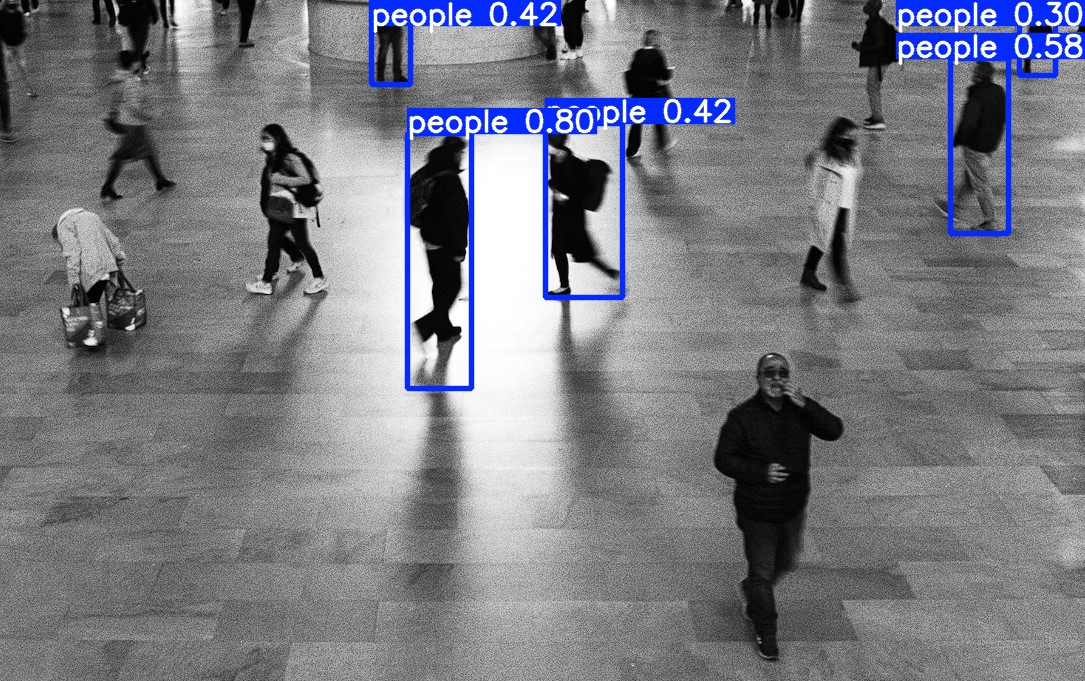

In [ ]:
from google.colab import files
from IPython.display import Image
import shutil

detect_dir = '/content/runs/detect'
model_dir = 'yolov8n_v1_train'
model_dir_path = os.path.join(detect_dir, model_dir)

uploaded = files.upload()
model = YOLO(model_dir_path+'/weights/best.pt')

upload_dir = '/content/'
predict_dir = '/runs/detect/predict'

for filename in uploaded.keys():
  if os.path.exists('/content/runs/detect/predict'):
    print("Found '/runs/detect/predict' folder, deleting it...")
    shutil.rmtree('/content/runs/detect/predict')
    print("Deleted '/runs/detect/predict' folder.")
  else:
    print("No '/runs/detect/predict' folder found.")
    print()

  model.predict(source=os.path.join(filename), save=True)

Image(filename='/content/runs/detect/predict/'+filename, width=600)